In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
X = pd.read_csv('./Logistic_X_Train.csv')
Y = pd.read_csv('./Logistic_Y_Train.csv')

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

In [6]:
X_train = X_train.values
Y_train = Y_train.values
X_test = X_test.values
Y_test = Y_test.values

In [7]:
print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(2400, 3) (600, 3)
(2400, 1) (600, 1)


Implementation

In [8]:
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

def hypothesis(X,theta):
    # X - entire array (m,n+1)
    # theta - np.array(n+1,1)
    return sigmoid(np.dot(X,theta))

In [9]:
def error(X,y,theta):

    hi = hypothesis(X,theta)
    e = -1*np.mean(y*np.log(hi)+(1-y)*np.log(1-hi))
    return e

def gradient(X,y,theta):

    hi = hypothesis(X,theta)
    grad = np.dot(X.T,(y-hi))
    return grad/X.shape[0]

def gradient_descent(X,y,lr=0.1,max_itr=500):
    n = X.shape[1]
    theta = np.zeros((n,1))
    
    error_list = []
    for i in range(max_itr):
        err = error(X,y,theta)
        error_list.append(err)
        if i!=0 and error_list[i-1]-error_list[i]<0.001:
            break
        grad = gradient(X,y,theta)
        
        theta = theta + lr*grad
    return theta ,error_list

In [10]:
ones = np.ones ((X_train.shape[0],1))
X_new_train = np.hstack((ones,X_train))
print(X_new_train)
print(X_new_train.shape)

[[ 1.          0.60731803  0.2022459   1.38171053]
 [ 1.         -1.91679415  0.29388759  0.17013801]
 [ 1.         -1.95991915  0.73456669 -0.43010469]
 ...
 [ 1.         -1.02391647  1.28986657 -0.41530989]
 [ 1.         -0.4996222   0.35511094 -2.23022552]
 [ 1.         -1.88733698  0.2486455   0.13410791]]
(2400, 4)


In [11]:
ones = np.ones ((X_test.shape[0],1))
X_new_test = np.hstack((ones,X_test))
print(X_new_test)
print(X_new_test.shape)

[[ 1.          0.16794229  2.32981554 -1.39588312]
 [ 1.         -0.76477923  1.35737961 -0.95286142]
 [ 1.         -1.05773623  1.3048622  -0.24983802]
 ...
 [ 1.         -0.59305482  0.8093364  -1.79360136]
 [ 1.          0.66902497  0.99967232  0.95541817]
 [ 1.          2.01353901  1.67453529  1.37419136]]
(600, 4)


In [12]:
theta , error_list = gradient_descent(X_new_train,Y_train)

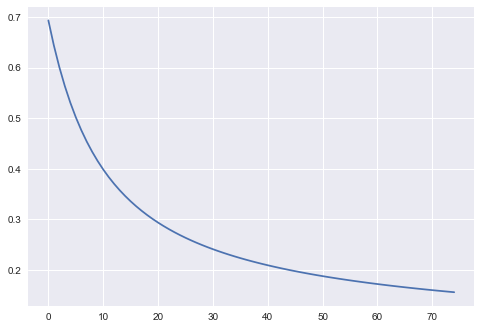

In [13]:
plt.style.use('seaborn')
plt.plot(error_list)
plt.show()

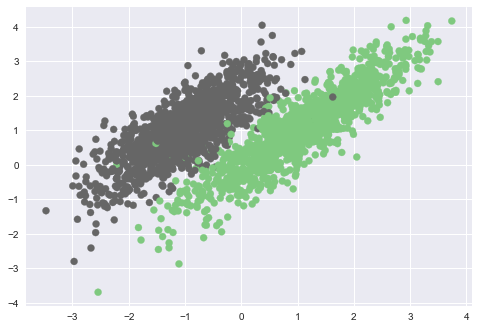

In [14]:
plt.style.use('seaborn')
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap=plt.cm.Accent)
plt.show()

In [15]:
theta

array([[-0.17604255],
       [-1.13336891],
       [ 0.34510279],
       [-1.17408207]])

In [16]:
def predict(X,theta):
    h = hypothesis(X,theta)
    output = np.zeros(h.shape)
    output[h>=0.5] = 1
    output = output.astype('int')
#     print(output[:5,:])
    return output

In [17]:
predict(X_new_train,theta)

array([[0],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [18]:
XT_pred = predict(X_new_train,theta)
Xt_pred = predict(X_new_test,theta)

In [19]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

In [20]:
print(XT_pred.shape)
print(Xt_pred.shape)

(2400, 1)
(600, 1)


In [21]:
accuracy(Y_train,XT_pred)

0.96875

In [22]:
accuracy(Y_test,Xt_pred)

0.9716666666666667